In [1]:
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-8e3f60b3-9b5a-46d3-836e-9138d21a3e02
Send 'exit' command to kill the server
....MATLAB started and connected!


/home/saket/anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


## Part (a)

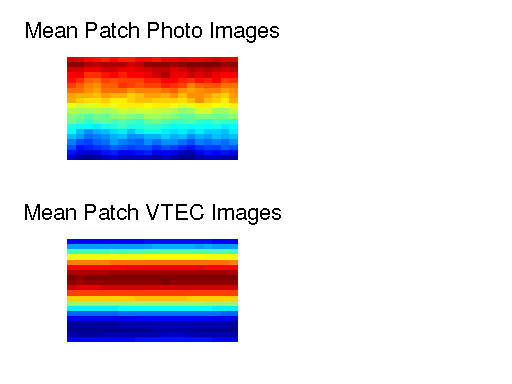

In [2]:
%%matlab
load('PCA_Exercise_Images.mat')
img = {};
img{1} = Photo_Images;
img{2} = VTEC_Images;
f = figure('position', [0, 0, 1400, 1400]);
for k=1:numel(img)
    vectorized_images = [];
    im = img{k};
    [nrow, ncol, nimg] = size(im);
    for i=1:nimg
        vimg = vectorize_image(im(:,:,i));
        vectorized_images = [vectorized_images; vimg];
    end
    set(gca,'XTick',[]);
    mean_patch = reshape(mean(vectorized_images), 20,20);
    if (k==1)
        subplot(2,2,1)
        imagesc(mean_patch)
        title('Mean Patch Photo Images')
    else 
        subplot(2,2,3)
        imagesc(mean_patch)
        title('Mean Patch VTEC Images')
    end

    axis off;
end


## Part (b)

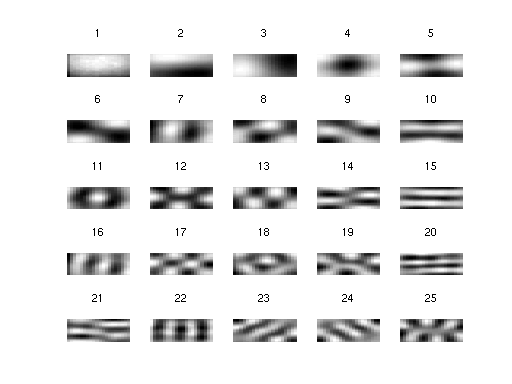

In [10]:
%%matlab
load('PCA_Exercise_Images.mat')
vectorized_images = [];
[nrow, ncol, nimg] = size(Photo_Images);
for i=1:nimg
    vimg = vectorize_image(Photo_Images(:,:,i));
    vectorized_images = [vectorized_images; vimg];
end
vectorized_images = double(vectorized_images);
[eigvals, eigvecs, projected, reconstructed] = perform_pca(vectorized_images, 25);
figure('position', [0, 0, 5000, 5000]) 
for i=1:25
    eigimage = reshape(eigvecs(:,i),20,20);
    g=subplot(5,5,i);
    colormap(gray);
    imagesc(eigimage);
    axis off;
    title(i, 'FontSize', 6);

end

